In [255]:
import datetime
import pandas as pd
import numpy as np
import requests
import pandas_datareader as pdr
import matplotlib.dates as mdate

import urllib#.request, urllib.error, urllib.parse
import urllib.request

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 10.0)

In [ ]:
### TODO
# https://fred.stlouisfed.org/graph/fredgraph.csv?id=FEDFUNDS
# https://alfred.stlouisfed.org/series?seid=UMCSENT

In [254]:
### Unemployement rate TODO
### https://data.bls.gov/pdq/SurveyOutputServlet

### FED Interest rate
#### https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year=2019

In [195]:
def getCsvData(url):
    
    urlStr = url
    data = None
    try:
        data = urllib.request.urlopen(urlStr)
    except Exception as e:
        s = "Failed to download:n{0}".format(e);
        print(s)
        
    headerLine = 0
    return pd.read_csv(data,header=headerLine,index_col=0,parse_dates=True)

### Fed funds rate

In [201]:
df_fed_fund_rate = getCsvData("https://fred.stlouisfed.org/graph/fredgraph.csv?id=FEDFUNDS")
df_fed_fund_rate.index = pd.to_datetime(df_fed_fund_rate.index)
df_fed_fund_rate.tail()

,FEDFUNDS
DATE,
2018-12-01,2.27
2019-01-01,2.40
2019-02-01,2.40
2019-03-01,2.41
2019-04-01,2.42


### Consumer Sentiment

In [203]:
df_consumer_sentiment = getCsvData("https://fred.stlouisfed.org/graph/fredgraph.csv?id=UMCSENT")
df_consumer_sentiment.index = pd.to_datetime(df_consumer_sentiment.index)
df_consumer_sentiment.tail()

,UMCSENT
DATE,
2018-11-01,97.5
2018-12-01,98.3
2019-01-01,91.2
2019-02-01,93.8
2019-03-01,98.4


### US Inflation

In [231]:
# https://www.usinflationcalculator.com/inflation/historical-inflation-rates/
inflation_rate_url = 'https://www.usinflationcalculator.com/inflation/historical-inflation-rates/'

html = requests.get(inflation_rate_url).content
df_list = pd.read_html(html)
inflation_rate_list = df_list[0]

# manage
header_list = inflation_rate_list.iloc[0]
inflation_rate_list.drop(0, axis=0, inplace=True)
inflation_rate_list.columns = header_list

inflation_rate_list.tail(20)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave
87,2000,2.7,3.2,3.8,3.1,3.2,3.7,3.7,3.4,3.5,3.4,3.4,3.4,3.4
88,2001,3.7,3.5,2.9,3.3,3.6,3.2,2.7,2.7,2.6,2.1,1.9,1.6,2.8
89,2002,1.1,1.1,1.5,1.6,1.2,1.1,1.5,1.8,1.5,2.0,2.2,2.4,1.6
90,2003,2.6,3.0,3.0,2.2,2.1,2.1,2.1,2.2,2.3,2.0,1.8,1.9,2.3
91,2004,1.9,1.7,1.7,2.3,3.1,3.3,3.0,2.7,2.5,3.2,3.5,3.3,2.7
92,2005,3.0,3.0,3.1,3.5,2.8,2.5,3.2,3.6,4.7,4.3,3.5,3.4,3.4
93,2006,4.0,3.6,3.4,3.5,4.2,4.3,4.1,3.8,2.1,1.3,2.0,2.5,3.2
94,2007,2.1,2.4,2.8,2.6,2.7,2.7,2.4,2.0,2.8,3.5,4.3,4.1,2.8
95,2008,4.3,4.0,4.0,3.9,4.2,5.0,5.6,5.4,4.9,3.7,1.1,0.1,3.8
96,2009,0.0,0.2,-0.4,-0.7,-1.3,-1.4,-2.1,-1.5,-1.3,-0.2,1.8,2.7,-0.4


### GDP 
### https://alfred.stlouisfed.org/series?seid=A191RL1Q225SBEA

In [230]:
df_gdp = getCsvData("https://fred.stlouisfed.org/graph/fredgraph.csv?id=A191RL1Q225SBEA")

df_gdp.index = pd.to_datetime(df_gdp.index)
df_gdp.tail()

,A191RL1Q225SBEA
DATE,
2018-01-01,2.2
2018-04-01,4.2
2018-07-01,3.4
2018-10-01,2.2
2019-01-01,3.2


### US Bond yields

In [40]:
fed_rate_url = 'https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year=1999'

html = requests.get(fed_rate_url).content
df_list = pd.read_html(html)
rate_list = df_list[1]

rate_list.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Date,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
1,01/04/99,NaN,NaN,4.49,4.57,4.58,4.58,4.57,4.57,4.75,4.69,5.42,5.15
2,01/05/99,NaN,NaN,4.48,4.57,4.56,4.64,4.64,4.62,4.80,4.74,5.48,5.21
3,01/06/99,NaN,NaN,4.47,4.55,4.53,4.62,4.62,4.61,4.76,4.73,5.42,5.17
4,01/07/99,NaN,NaN,4.44,4.49,4.51,4.63,4.63,4.62,4.82,4.77,5.48,5.23


### Earnings yield
#### https://www.multpl.com/s-p-500-earnings-yield/table/by-month

In [99]:
earnings_yield_url = 'https://www.multpl.com/s-p-500-earnings-yield/table/by-month'

html = requests.get(earnings_yield_url).content
df_list = pd.read_html(html)
yield_list = df_list[0]

yield_list.head(10)

,0,1
0,Date,Value Value
1,"May 17, 2019",4.63% estimate
2,"Apr 1, 2019",4.62% estimate
3,"Mar 1, 2019",4.70% estimate
4,"Feb 1, 2019",4.74% estimate
5,"Jan 1, 2019",5.09% estimate
6,"Dec 1, 2018",5.16%
7,"Nov 1, 2018",4.84%
8,"Oct 1, 2018",4.71%
9,"Sep 1, 2018",4.49%


In [100]:
####
header_yield_list = yield_list.iloc[0]
yield_list.drop(0, axis=0, inplace=True)
yield_list.columns = header_yield_list

#rate_list["Date"]#.head(10)
yield_list.index = yield_list["Date"]
yield_list.drop("Date", axis=1, inplace=True)
# convert index to datetime
yield_list.index = pd.to_datetime(yield_list.index)

yield_list["Value Value"] = yield_list["Value Value"].apply(lambda x: x.replace('%',''))
yield_list["Value Value"] = yield_list["Value Value"].apply(lambda x: x.replace('estimate',''))

# convert tu numeric
yield_list = yield_list.apply(pd.to_numeric)

yield_list.head(10)



,Value Value
Date,
2019-05-17,4.63
2019-04-01,4.62
2019-03-01,4.70
2019-02-01,4.74
2019-01-01,5.09
2018-12-01,5.16
2018-11-01,4.84
2018-10-01,4.71
2018-09-01,4.49


In [68]:
def manage_fed_rate_table(rate_df):
    header_fed_rate = rate_df.iloc[0]
    rate_list.drop(0, axis=0, inplace=True)
    rate_list.columns = header_fed_rate
    rate_list.index = rate_list["Date"]
    rate_list.drop("Date", axis=1, inplace=True)
    return rate_list


now = datetime.datetime.now()

total_fed_rates_df = pd.DataFrame()
for year in range(1998,int(now.year)+1): 
    print(year)

    fed_rate_url = 'https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year='+str(year)
    print(fed_rate_url)
    html = requests.get(fed_rate_url).content
    df_list = pd.read_html(html)
    rate_list = df_list[1]
    rate_list = manage_fed_rate_table(rate_list)
    total_fed_rates_df = pd.concat([total_fed_rates_df, rate_list])
    print(rate_list.head())
    
# convert tu numeric
total_fed_rates_df = total_fed_rates_df.apply(pd.to_numeric)
# convert index to datetime
total_fed_rates_df.index = pd.to_datetime(total_fed_rates_df.index)
total_fed_rates_df.head()

1998
https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year=1998
0        1 mo 2 mo  3 mo  6 mo  1 yr  2 yr  3 yr  5 yr  7 yr 10 yr 20 yr 30 yr
Date                                                                          
01/02/98  NaN  NaN  5.32  5.40  5.46  5.59  5.62  5.63  5.68  5.67  5.94  5.86
01/05/98  NaN  NaN  5.23  5.32  5.35  5.47  5.47  5.46  5.52  5.52  5.82  5.74
01/06/98  NaN  NaN  5.22  5.30  5.30  5.39  5.42  5.41  5.49  5.49  5.80  5.73
01/07/98  NaN  NaN  5.23  5.30  5.31  5.42  5.45  5.45  5.55  5.55  5.88  5.80
01/08/98  NaN  NaN  5.13  5.20  5.20  5.31  5.33  5.34  5.46  5.49  5.82  5.75
1999
https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year=1999
0        1 mo 2 mo  3 mo  6 mo  1 yr  2 yr  3 yr  5 yr  7 yr 10 yr 20 yr 30 yr
Date                                                                          
01/04/99  NaN  NaN  4.49  4.57  4.58  4.5

0         1 mo 2 mo  3 mo  6 mo  1 yr  2 yr  3 yr  5 yr  7 yr 10 yr 20 yr  \
Date                                                                        
01/02/09  0.04  NaN  0.08  0.28  0.40  0.88  1.14  1.72  2.07  2.46  3.22   
01/05/09  0.05  NaN  0.14  0.32  0.43  0.78  1.08  1.67  2.07  2.49  3.37   
01/06/09  0.05  NaN  0.14  0.31  0.45  0.80  1.10  1.68  2.07  2.51  3.41   
01/07/09  0.03  NaN  0.11  0.29  0.44  0.82  1.15  1.66  2.02  2.52  3.41   
01/08/09  0.04  NaN  0.09  0.28  0.44  0.83  1.16  1.60  1.95  2.47  3.40   

0        30 yr  
Date            
01/02/09  2.83  
01/05/09  3.00  
01/06/09  3.04  
01/07/09  3.05  
01/08/09  3.04  
2010
https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year=2010
0         1 mo 2 mo  3 mo  6 mo  1 yr  2 yr  3 yr  5 yr  7 yr 10 yr 20 yr  \
Date                                                                        
01/04/10  0.05  NaN  0.08  0.18  0.45  1.09  1.66  2.65  3.36  

,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
Date,,,,,,,,,,,,
1998-01-02,NaN,NaN,5.32,5.40,5.46,5.59,5.62,5.63,5.68,5.67,5.94,5.86
1998-01-05,NaN,NaN,5.23,5.32,5.35,5.47,5.47,5.46,5.52,5.52,5.82,5.74
1998-01-06,NaN,NaN,5.22,5.30,5.30,5.39,5.42,5.41,5.49,5.49,5.80,5.73
1998-01-07,NaN,NaN,5.23,5.30,5.31,5.42,5.45,5.45,5.55,5.55,5.88,5.80
1998-01-08,NaN,NaN,5.13,5.20,5.20,5.31,5.33,5.34,5.46,5.49,5.82,5.75


In [67]:
total_fed_rates_df[["10 yr"]].head()

,10 yr
Date,
2016-01-04,2.24
2016-01-05,2.25
2016-01-06,2.18
2016-01-07,2.16
2016-01-08,2.13


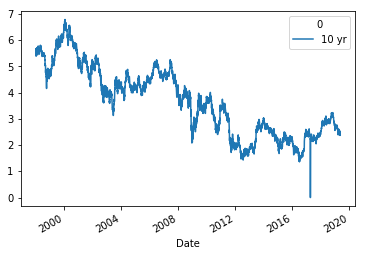

In [69]:
total_fed_rates_df[["10 yr"]].plot()

In [101]:
#yield_list.index > datetime.date(2016,3,1)
c0 = yield_list.index.to_series().between('1998-01-01', str(year)+'-12-31')
yield_list[c0].head()

,Value Value
Date,
2019-05-17,4.63
2019-04-01,4.62
2019-03-01,4.70
2019-02-01,4.74
2019-01-01,5.09


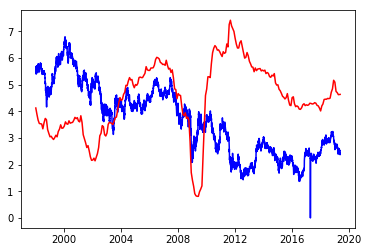

In [104]:
plt.plot(total_fed_rates_df.index, total_fed_rates_df[["10 yr"]].values, 'b') # plotting t, a separately 
plt.plot(yield_list[c0].index, yield_list[c0]["Value Value"].values, 'r') # plotting t, b separately 
#plt.plot(t, c, 'g') # plotting t, c separately 
plt.show()

In [107]:
total_fed_rates_df.tail()


,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
Date,,,,,,,,,,,,
2019-05-13,2.41,2.42,2.41,2.42,2.32,2.18,2.15,2.18,2.28,2.40,2.65,2.83
2019-05-14,2.41,2.42,2.41,2.43,2.32,2.20,2.17,2.20,2.30,2.42,2.67,2.86
2019-05-15,2.40,2.41,2.42,2.43,2.30,2.16,2.12,2.15,2.25,2.37,2.63,2.82
2019-05-16,2.40,2.41,2.40,2.43,2.33,2.20,2.15,2.18,2.28,2.40,2.65,2.84
2019-05-17,2.39,2.40,2.39,2.42,2.33,2.20,2.15,2.17,2.27,2.39,2.63,2.82


In [109]:
yield_list.head()

,Value Value
Date,
2019-05-17,4.63
2019-04-01,4.62
2019-03-01,4.70
2019-02-01,4.74
2019-01-01,5.09


In [121]:
((2.39/100)/(4.63/100))-1

-0.48380129589632825

In [122]:
0.095/0.07-1

0.357142857142857

In [152]:
#pd.Series(total_fed_rates_df.index).isin(yield_list[c0].index)
merged_df = pd.merge(total_fed_rates_df[["10 yr"]],yield_list, how='inner', left_index=True, right_index=True)
merged_df.columns = ["bond10y","earnings_yield"]
merged_df = merged_df/100
merged_df.head()

,bond10y,earnings_yield
Date,,
1998-04-01,0.0562,0.0354
1998-05-01,0.0567,0.0353
1998-06-01,0.0553,0.0352
1998-07-01,0.0544,0.0334
1998-09-01,0.0505,0.0373


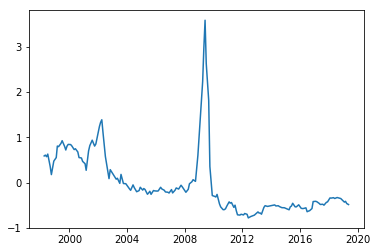

In [155]:
plt.plot((merged_df.bond10y / merged_df.earnings_yield)-1)

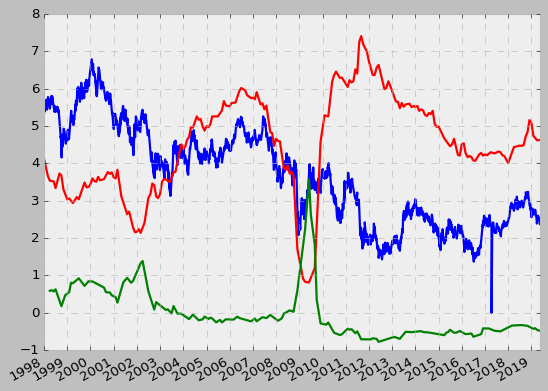

In [186]:

plt.plot(total_fed_rates_df.index, total_fed_rates_df[["10 yr"]].values, 'b', label="yield 10y bond") # plotting t, a separately 
plt.plot(yield_list[c0].index, yield_list[c0]["Value Value"].values, 'r', label="S&P Earnings Yield") # plotting t, b separately 
plt.plot((merged_df.bond10y / merged_df.earnings_yield)-1, 'G', label="Overvaluation vis a vis Bond")

locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()

plt.show()

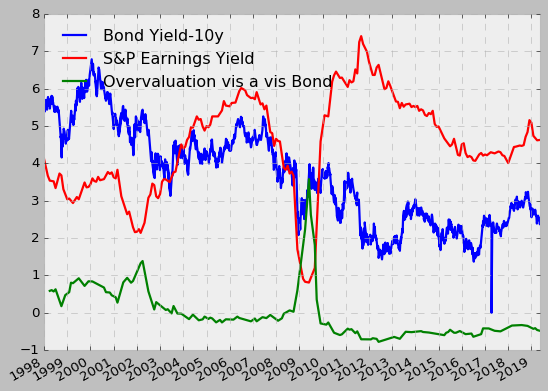

In [187]:
plt.style.use('fast')
fig, ax = plt.subplots()
ax.plot(total_fed_rates_df.index, total_fed_rates_df[["10 yr"]].values, 'b', label="Bond Yield-10y") # plotting t, a separately 
ax.plot(yield_list[c0].index, yield_list[c0]["Value Value"].values, 'r', label="S&P Earnings Yield") # plotting t, b separately 
ax.plot((merged_df.bond10y / merged_df.earnings_yield)-1, 'G', label="Overvaluation vis a vis Bond")
locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()
leg = ax.legend(loc='upper left', frameon=False);

/home/xxx/anaconda2/envs/snakes/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


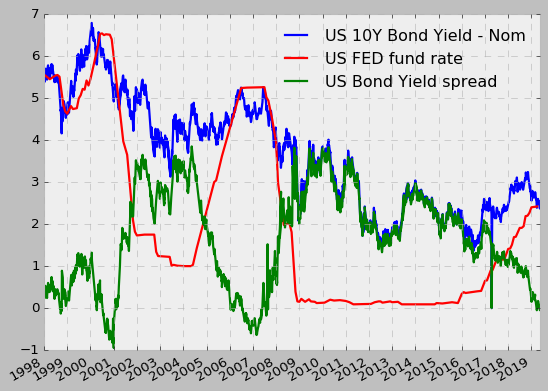

In [253]:
fig, ax = plt.subplots()
ax.plot(total_fed_rates_df.index, total_fed_rates_df[["10 yr"]].values, 'b', label="US 10Y Bond Yield - Nom")
ax.plot(df_fed_fund_rate[c0], 'r',label="US FED fund rate")
ax.plot(total_fed_rates_df["10 yr"] - total_fed_rates_df["3 mo"], 'g', label="US Bond Yield spread")
locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()
leg = ax.legend(loc='upper right', frameon=False);

/home/xxx/anaconda2/envs/snakes/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


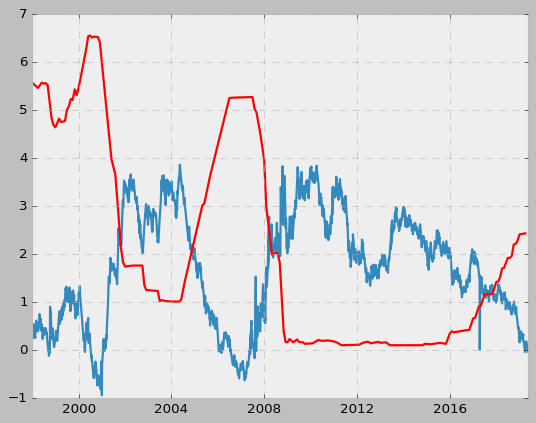

In [252]:
plt.plot(total_fed_rates_df["10 yr"] - total_fed_rates_df["3 mo"])
plt.plot(df_fed_fund_rate[c0], 'r',label="US FED fund rate")

In [ ]:
#total_fed_rates_df[["10 yr"]]